# WEB SEARCH Multi-Agent System using LangGraph for Workflow Orchestration

## Core Concept:
This is a multi-agent system using LangGraph for workflow orchestration, combining multiple specialized AI agents with web search capabilities for comprehensive task handling.

## Framework Components:

Agents:
A. Executive Agent (Workflow Controller)
B. Prompt Engineer (Prompt Optimizer)
C. Reasoning Agent (Decision Maker)
D. Research Agent (Web Search - DuckDuckGo)
E. Summarization Agent (Content Condenser)
F. QA Checker (Answer Validator)
G. Fact Checker (Evidence Verifier)

Key Technologies:
LangGraph (Workflow Orchestration)
Google Gemini (LLM Backbone)
DuckDuckGo Search (Information Retrieval)
Conversation Memory (Context Preservation)

Explanation of the Diagram:

The workflow starts with the Executive Agent (A) that takes in the user's task.
It then flows to the Prompt Engineer (B) which refines the prompt.
The Reasoning Agent (C) analyzes whether an external search is necessary.
If "SEARCH" is returned, the flow goes to the Research Agent (D) which fetches current info.
Otherwise, it bypasses research and goes directly to the Summarization Agent (E).
In both cases, the summarization agent produces a concise summary.
Then, the QA Checker (F) and Fact Checker (G) validate and verify the answer before the workflow ends (H).

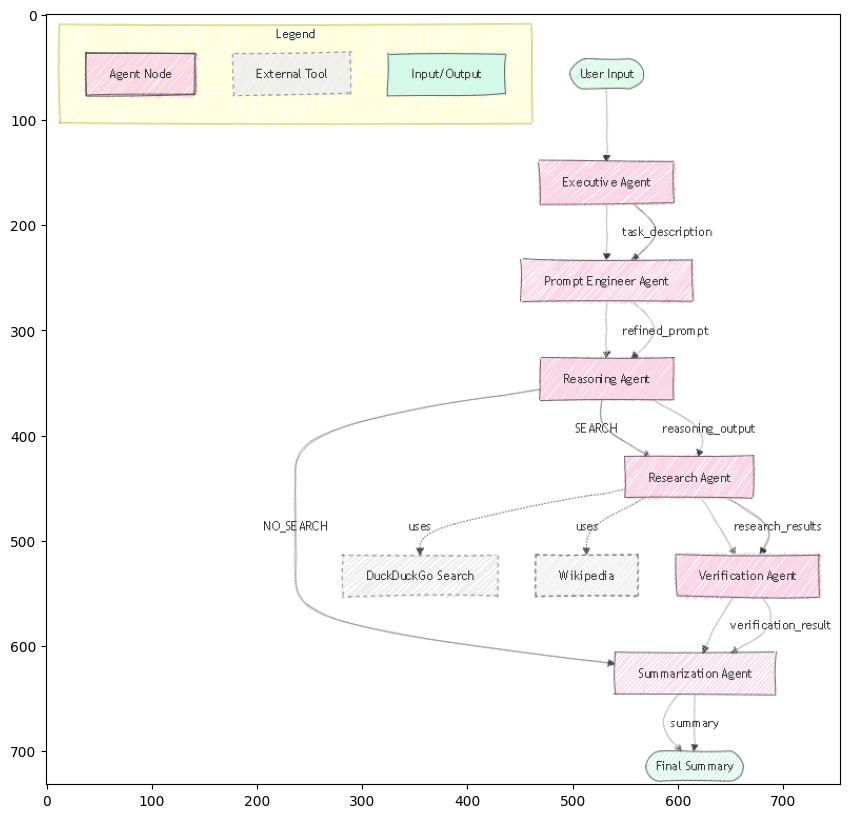

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# Open the image
image = Image.open('/content/drive/MyDrive/Agentic_websearch.png')

# Set the figure size (adjust width and height as needed)
plt.figure(figsize=(12, 10))  # Example: 10 inches wide, 8 inches tall

# Display the image
plt.imshow(image)

# Show the plot
plt.show()

##Initialization & Setup
Imports & Logging: The code imports many modules from LangChain, LangGraph, and others. Logging is set up to help trace execution (you might say it’s the referee in our relay race).

API Keys & Environment Variables:API tokens for HuggingFace, LangChain, Gemini, etc., are defined and set as environment variables. This ensures that all our agents know how to access their superpowers (a.k.a., the models and tools).

API Keys & Environment Variables:
API tokens for HuggingFace, LangChain, Gemini, etc., are defined and set as environment variables. This ensures that all our agents know how to access their superpowers (a.k.a., the models and tools).

##Defining LLMs and Tools
LLM Agents:
Six different instances of a generative AI model (using Google Gemini “gemini-1.5-flash”) are created. Each agent specializes in a task:

Executive Agent: Sets the overall task.
Prompt Engineer: Refines the user’s input prompt.
Reasoning Agent: Analyzes the refined prompt and decides if a web search is needed (returns "SEARCH" or not).
Research Agent: Uses a DuckDuckGo search tool to gather current information.
Summarization Agent: Summarizes the gathered research.
QA Checker & Fact Checker: Validate the generated answer.
Tool – DuckDuckGo Search:
The code defines a search tool using LangChain’s DuckDuckGoSearchRun. This tool is later used by the research agent when the reasoning agent deems it necessary.

##Defining Agent Task Functions
Each agent has its own dedicated function:

Executive Agent Task:
Receives the task description (from the user) and instructs the next agent.

Prompt Engineer Task:
Takes the initial user prompt and refines it (even producing three numbered improved versions, then selects the first).

Reasoning Agent Task:
Analyzes the refined prompt (or reasoning context) and outputs "SEARCH" if external research is needed, otherwise something else.

Research Agent Task:
Uses the DuckDuckGo search tool to fetch current data.

Summarization, QA, and Fact Checker Tasks:
These further process the information—summarizing the research, checking the answer against a QA prompt, and verifying facts with evidence.

##State Management
A @dataclass AgentState is defined to hold the entire conversation state. It has fields for:

The original task description.
The initial and refined prompts.
The research query and results.
The reasoning context and output.
Text to be summarized and the final summary.
QA and fact-check details.
And even a chat history.
This state is passed along from node to node, so each agent “remembers” what came before (like passing a baton with notes on it).

##Building the Workflow Graph
Using LangGraph’s StateGraph, the code creates nodes corresponding to each task:

Nodes Added:

"executive_agent"
"prompt_engineer"
"reasoning_agent"
"research_agent"
"summarization_agent"
"qa_checker_agent"
"fact_checker_agent"

##Edges & Conditional Branching:
The workflow starts at the Executive Agent node.
It flows to the Prompt Engineer, then to the Reasoning Agent.
Conditional Branching:
The decision from the reasoning agent is used by the decide_to_search function:
If the output is "SEARCH", the graph moves to the Research Agent.
Otherwise, it skips directly to the Summarization Agent.
After summarization, the flow goes through the QA Checker and Fact Checker, ending the workflow.
##Execution: The Chat Loop
User Interaction:
The code enters an infinite loop where it:
Prompts the user for input.
Initializes the AgentState with the user’s message (used both as task description and initial prompt).
Invokes the compiled workflow (cot_agent_chain.invoke()) with the conversation memory.
Prints out the results from each agent node (executive instruction, refined prompt, reasoning output, search results, summary, QA and fact check results).

In [1]:
"""
!pip install langchain langgraph transformers sentence-transformers
!pip install huggingface_hub
!pip install langchain-community langchain-openai
!pip install langchain-google-genai
!pip install -U duckduckgo-search
!pip install wikipedia
!pip uninstall -y google-ai-generativelanguage
!pip install google-ai-generativelanguage==0.6.16 # Install a specific compatible version
!pip install backoff
#"""



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.9/130.9 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 27.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.3/55.3 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 52.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 414.3/414.3 kB 34.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 58.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 5.8 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.31
    Uninstalling langchain-core-0.3.31:
      Successfully uninstalled langchain-core-0.3.31
  Attempting uninstall: langchain-text-splitters
    Found existing installation: langchain-text-splitters 0.3.5
    Uninstalling langchain-text-splitters-0.3.5:
      Successfully uninst

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 29.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11679 sha256=5c233a85fac02f4cbe530c28f2f823bf97bedfd4eb000b186cfa958b26e0c32a
  Stored in directory: /root/.cache/pip/wheels/8f/ab/cb/45ccc40522d3a1c41e1d2ad53b8f33a62f394011ec38cd71c6
Successfully built wikipedia
Found existing installation: google-ai-generativelanguage 0.6.16
Uninstalling google-ai-generativelanguage-0.6.16:
  Successfully uninstalled google-ai-generativelanguage-0.6.16
  Using cached google_ai_generativelanguage-0.6.16-py3-none-any.whl.metadata (5.7 kB)
Using cached google_ai_generativelanguage-0.6.16-py3-none-any.whl (1.4 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-generativeai 0.8.4 requires google-ai-generativelanguage==0.6.15, but

In [3]:
import os
from dotenv import load_dotenv
load_dotenv()

from langchain_community.document_loaders import WebBaseLoader
from langchain_community.tools import WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper
from langchain_core.agents import AgentAction, AgentFinish
from langchain.agents import initialize_agent, AgentType
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder
from langchain_core.messages import AIMessage, HumanMessage
from langchain.memory import ConversationBufferMemory
from langgraph.graph import StateGraph, END
from langchain_core.messages import BaseMessage
from typing import List, Dict, Any, Optional, Sequence, Tuple
from dataclasses import dataclass
import logging
from langchain_google_genai import ChatGoogleGenerativeAI
import time
from langchain.prompts import SystemMessagePromptTemplate, HumanMessagePromptTemplate, ChatPromptTemplate
from langchain_community.tools.ddg_search.tool import DuckDuckGoSearchRun
from langchain.embeddings import HuggingFaceEmbeddings
from backoff import expo, on_exception
import textwrap


from google.colab import userdata
os.environ['GEMINI_API_KEY'] = userdata.get('GEMINI_API_KEY')


logging.basicConfig(level=logging.INFO)
logging.info("Executive Agent is working...")

# 1. Define LLMs for Each Agent (Gemini 1.5 Flash)
llm_executive = ChatGoogleGenerativeAI(model="gemini-1.5-flash", temperature=0.1, google_api_key= os.getenv("GEMINI_API_KEY"))
llm_prompt_engineer = ChatGoogleGenerativeAI(model="gemini-1.5-flash", temperature=0.2, google_api_key= os.getenv("GEMINI_API_KEY"))
llm_reasoning = ChatGoogleGenerativeAI(model="gemini-1.5-flash", temperature=0.3, google_api_key= os.getenv("GEMINI_API_KEY"))
llm_summarization = ChatGoogleGenerativeAI(model="gemini-1.5-flash", temperature=0.1, google_api_key= os.getenv("GEMINI_API_KEY"))
llm_qa_checker = ChatGoogleGenerativeAI(model="gemini-1.5-flash", temperature=0.0, google_api_key= os.getenv("GEMINI_API_KEY"))
llm_fact_checker = ChatGoogleGenerativeAI(model="gemini-1.5-flash", temperature=0.0, google_api_key= os.getenv("GEMINI_API_KEY"))

# Embedding model (for potential future use)
embedding_model = HuggingFaceEmbeddings(model_name="sentence-transformers/all-mpnet-base-v2")

# 2. Define Tools

# DuckDuckGo Search Tool
search_tool = DuckDuckGoSearchRun(
    name="DuckDuckGo Search",
    description="Searches the web for current information using DuckDuckGo. Use this tool for fact-checking, current events, or recent developments. Input: search query. Output: Relevant text snippets from DuckDuckGo search results."
)

# Wikipedia Tool
wikipedia = WikipediaAPIWrapper()
wikipedia_tool = WikipediaQueryRun(
    api_wrapper=wikipedia,
    name="Wikipedia",
    description="Searches Wikipedia for factual information. Use this tool for general knowledge, historical information, or background on a topic. Input: search query. Output:  Summary from Wikipedia."
)

# 3. Define Agent Task Functions

system_message = SystemMessagePromptTemplate.from_template(
    "You are a research assistant. Your task is to find and summarize relevant information using the DuckDuckGo Search tool. Always cite your sources (URLs). Focus on providing factual and concise information to answer the user's query."
)
human_message = HumanMessagePromptTemplate.from_template("{input}")
chat_prompt = ChatPromptTemplate.from_messages([system_message, human_message])

def executive_agent_task(task_description: str):
    """Directs the overall workflow and delegates tasks."""
    prompt = f"Executive Agent Task: {task_description}. Please instruct the next appropriate agent."
    return llm_executive.predict(prompt)

def prompt_engineer_task(initial_prompt: str):
    """Refines an initial prompt to be more effective and returns a list of refined prompts."""
    prompt = f"Refine this prompt for better results: '{initial_prompt}'. Suggest 3 improved prompts. Return each improved prompt on a new line, starting with a number like '1.', '2.', '3.', etc."
    refined_prompts_string = llm_prompt_engineer.predict(prompt)
    refined_prompts = [line.split('. ', 1)[1] for line in refined_prompts_string.strip().split('\n') if line.strip() and '. ' in line and line.split('. ', 1)[0].isdigit()]
    return refined_prompts

def reasoning_agent_task(context: str):
    """Performs reasoning and analysis based on given context."""
    prompt = f"Reasoning based on context: '{context}'. Analyze if external web search is needed based on the prompt: '{context}'. If search is needed, output 'SEARCH'. If not, output 'NO_SEARCH'."
    return llm_reasoning.predict(prompt)

@on_exception(expo, Exception, max_tries=3)
def summarization_agent_task(text: str):
    """
    Summarizes a given text, focusing on factual accuracy and context preservation for QA and Fact-Checking.

    This agent creates concise summaries of research findings, emphasizing key factual statements and ensuring enough context is retained for verification in subsequent steps.

    The summary should:
    - Be factually accurate and reflect the original text.
    - Focus on presenting key information and core arguments.
    - Retain enough context for each summarized fact to be understood and verified.
    - Be concise and avoid unnecessary details or opinions.
    - Implicitly represent the source of information as 'research findings'.

    Output: A concise, fact-focused summary of the input text, ready for QA and Fact-Checking.
    """
    prompt = f"""
    You are a Summarization Agent focused on creating summaries for Quality Assurance (QA) and Fact-Checking.

    Your goal is to summarize the following research text, highlighting key factual statements and retaining necessary context for verification.

    Summarization Guidelines:
    - Focus on factual information and core arguments from the text.
    - Ensure each summarized point is concise but retains enough context to be understood on its own and checked for accuracy.
    - Avoid including opinions, interpretations, or unnecessary details.
    - The summary should accurately reflect the original text.

    Research Text to Summarize:
    ---
    {text}
    ---

    Create a concise, fact-focused summary that is optimized for QA and Fact-Checking.
    """
    time.sleep(2)
    return llm_summarization.predict(prompt)

def research_agent_task(query: str, tools=[search_tool, wikipedia_tool]):
    """
    You are a Research Agent equipped with two tools: DuckDuckGo Search and Wikipedia. Your goal is to answer user queries by retrieving relevant information using the most appropriate tool(s).

    **Tool Descriptions:**

    1. **DuckDuckGo Search:**  Use this tool when the query requires up-to-date information from the web, such as current events, latest news, real-time data, product information, or diverse opinions. Think of it as searching the live, current web.

    2. **Wikipedia:** Use this tool when the query is about general knowledge, historical facts, scientific concepts, definitions, or background information. Think of it as accessing a vast encyclopedia for established knowledge.

    **Task:** Analyze the user's query and decide which tool (DuckDuckGo, Wikipedia, or both) is most suitable to find the answer.  Execute the search using the chosen tool(s).

    Input: search query. Output: Comprehensive research findings from DuckDuckGo and/or Wikipedia, ready for summarization.
    """
    agent = initialize_agent(
        llm=llm_reasoning,
        tools=tools,
        agent=AgentType.CHAT_ZERO_SHOT_REACT_DESCRIPTION,
        verbose=True,
        memory=ConversationBufferMemory(memory_key="chat_history", return_messages=True),
        prompt=chat_prompt,
    )
    return agent.run(query)

def verification_agent_task(question: str, research_results: str):
    """
    Performs a comprehensive verification of research results in relation to the user's question.

    This agent assesses both the quality and factual accuracy of the research results, ensuring they are relevant to the question, contextually sound, and factually supported.

    The agent evaluates:
    - **Relevance:** How relevant are the research results to the original question?
    - **Contextual Validity:** Do the research results provide coherent and contextually sound information?
    - **Factual Accuracy & Support:**  Are the claims made in the research results factually accurate and well-supported by evidence within the results themselves? (Self-contained check)

    Output: A structured verification assessment in the format:
    'Overall Assessment: [Valid & Well-Supported/Valid but Weakly Supported/Invalid - Relevance Issue/Invalid - Factual Issue/Unsure], Explanation: [detailed explanation covering relevance, contextual validity, and factual accuracy aspects]'
    """
    prompt = f"""
    You are a Verification Agent. Your task is to comprehensively evaluate research results in relation to a user's question.

    User Question: '{question}'
    Research Results:
    ---
    {research_results}
    ---

    Perform a thorough verification based on the following criteria:

    1. **Relevance to Question:**  Assess how directly and effectively the research results address the user's question. Are they highly relevant, somewhat relevant, or not relevant?

    2. **Contextual Validity:** Evaluate if the research results provide information that is coherent, makes logical sense, and is contextually valid. Are there any parts that are confusing, contradictory, or lack context?

    3. **Factual Accuracy & Support (Self-Contained Check):** Examine the claims and statements made within the research results themselves. Are these statements presented as facts? Do they seem factually accurate based on the information provided *within* the research results? (Note: This is a 'self-contained' fact check - you are not expected to do external fact-checking, only to assess internal consistency and plausibility based on the provided research results).

    Based on your verification, provide an overall assessment and a detailed explanation.

    Respond in the following structured format:
    'Overall Assessment: [Valid & Well-Supported/Valid but Weakly Supported/Invalid - Relevance Issue/Invalid - Factual Issue/Unsure], Explanation: [detailed explanation covering relevance, contextual validity, and factual accuracy aspects]'
    """ # IMPROVED PROMPT for combined verification - structured criteria & output format
    return llm_fact_checker.predict(prompt) # Reusing llm_fact_checker for verification for now - can adjust if needed

# 4. Define Langgraph State
@dataclass
class AgentState:
    task_description: str = ""
    initial_prompt: str = ""
    refined_prompt: str = ""
    research_query: str = ""
    research_results: str = ""
    reasoning_context: str = ""
    reasoning_output: str = ""
    verification_result: str = ""
    text_to_summarize: str = ""
    summary: str = ""
    chat_history: List[BaseMessage] = None

# 5. Define Langgraph Nodes
def execute_task(state: AgentState):
    """Executive Agent node."""
    print("Executive Agent is working...")
    try:
        task_instruction = executive_agent_task(state.task_description)
        print(f"Executive Agent Instruction: {task_instruction}")
        output_dict = {"task_description": state.task_description, "executive_instruction": task_instruction, "reasoning_context": state.refined_prompt}
        print(f"execute_task output: {output_dict}")
        return {"executive_agent": {"instruction": task_instruction}}
        #return output_dict
    except Exception as e:
        print(f"Error in execute_task calling executive_agent_task: {e}")
        return {}

def prompt_engineer(state: AgentState):
    """Prompt Engineer Agent node."""
    print("Prompt Engineer is working...")
    refined_prompts = prompt_engineer_task(state.initial_prompt)
    print(f"Refined Prompts: {refined_prompts}")
    first_refined_prompt = refined_prompts[0] if refined_prompts else state.initial_prompt
    print(f"First Refined Prompt (for search): {first_refined_prompt}")
    return {"refined_prompt": first_refined_prompt, "research_query": first_refined_prompt, "reasoning_context": first_refined_prompt, "all_refined_prompts": refined_prompts}

def research_info(state: AgentState):
    """Research Agent node."""
    print("Research Agent is working...")
    research_results = research_agent_task(state.research_query)
    print(f"Research Results: {research_results}")
    return {
        "research_results": research_results,
        "text_to_summarize": research_results
    }

def reason_task(state: AgentState):
    """Reasoning Agent node."""
    print("Reasoning Agent is working...")
    reasoning_output = reasoning_agent_task(state.reasoning_context)
    print(f"Reasoning Output: {reasoning_output}")
    return {"reasoning_output": reasoning_output}

def summarize_text(state: AgentState):
    print("Summarization Agent is working...")
    text = state.text_to_summarize if state.text_to_summarize else state.refined_prompt
    summary_output = summarization_agent_task(text)
    print(f"Summary: {summary_output}")
    state.summary = summary_output  # Save in state
    return {"summary": summary_output}



def check_verification(state: AgentState):
    """Verification Agent node - Combines QA and Fact Check."""
    print("Verification Agent is working...")
    verification_result = verification_agent_task(state.refined_prompt, state.research_results)
    print(f"Verification Result: {verification_result}")
    return {"verification_agent": {"result": verification_result}}
    #return {"verification_result": verification_result}


# 6. Define Langgraph Workflow
workflow = StateGraph(AgentState)

workflow.add_node("executive_agent", execute_task)
workflow.add_node("prompt_engineer", prompt_engineer)
workflow.add_node("reasoning_agent", reason_task)
workflow.add_node("research_agent", research_info)
workflow.add_node("verification_agent", check_verification)
workflow.add_node("summarization_agent", summarize_text)

search_counter = 3  # Initialize search counter

def decide_to_search(state):
    """Decides whether to go to research agent or summarization agent based on reasoning agent output."""
    global search_counter # Access the global counter variable
    reasoning_output = state.reasoning_output
    print(f"Decision Function - Reasoning Agent Output: {reasoning_output}")
    if reasoning_output and reasoning_output.strip().upper() == "SEARCH":
        print("Decision: Go to Research Agent")
        search_counter += 1 # Increment the search counter
        return "research_agent"
    else:
        print("Decision: Skip Research Agent, go to Summarization Agent")
        return "summarization_agent"

workflow.add_edge("executive_agent", "prompt_engineer")
workflow.add_edge("prompt_engineer", "reasoning_agent")
workflow.add_conditional_edges(
    "reasoning_agent",
    decide_to_search,
    {
        "research_agent": "research_agent",
        "summarization_agent": "summarization_agent" # Still an option if no search needed
    }
)
workflow.add_edge("research_agent", "verification_agent") # Research Agent now goes to Verification Agent
workflow.add_edge("verification_agent", "summarization_agent") # Verification Agent goes to Summarization
workflow.add_edge("summarization_agent", END) # Summarization to END

workflow.set_entry_point("executive_agent")
cot_agent_chain = workflow.compile()

# 10. Initialize Conversation Memory
memory = ConversationBufferMemory(memory_key="chat_history", return_messages=True)

# ========== COLOR CONFIG & PRINT FUNCTION ========== #
COLOR = {
    "HEADER": "\033[93m", #95
    "BLUE": "\033[94m",
    "CYAN": "\033[96m",
    "GREEN": "\033[92m",
    "YELLOW": "\033[93m",
    "RED": "\033[91m",
    "END": "\033[0m",
}

def print_agent_response(result, search_counter):
    """Displays agent responses in a structured format with color coding"""

    # Helper function for section formatting
    def print_section(title, content, color="", max_lines=5):
        print(f"\n{COLOR['BLUE']}╒═════ {title.upper()} ═════{COLOR['END']}")
        if content == 'N/A':
            print(f"{COLOR['YELLOW']}No data available{COLOR['END']}")
            return

        lines = str(content).split('\n')
        truncated = lines[:max_lines]
        for line in truncated:
            print(f"{color}{line}{COLOR['END']}")

        if len(lines) > max_lines:
            print(f"{COLOR['CYAN']}[... {len(lines)-max_lines} lines truncated ...]{COLOR['END']}")

    print(f"\n{COLOR['HEADER']}🟢 AGENT RESPONSE OVERVIEW 🟢{COLOR['END']}")

    # Workflow Progress
    print(f"\n{COLOR['CYAN']}⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯")
    print(f"🔍 SEARCH COUNT: {search_counter}")
    print(f"⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯{COLOR['END']}")

    summary = result.get('summary', 'N/A')
    # Wrap the summary text into a proper paragraph (80 characters per line)
    wrapped_summary = textwrap.fill(summary, width=80)

    print(f"\n{COLOR['HEADER']}🟢🟢 FINAL SUMMARY 🟢🟢{COLOR['END']}")
    print(f"{COLOR['GREEN']}{wrapped_summary}{COLOR['END']}")
    print(f"{COLOR['HEADER']}🔴 END OF SUMMARY 🔴{COLOR['END']}\n")


# 11. Chat Loop
while True:
    user_input = input("You: ")
    if user_input.lower() == "exit":
        break
    task_input = {
        "task_description": user_input,
        "initial_prompt": user_input,
        "refined_prompt": "",
        "research_query": "",
        "research_results": "",
        "reasoning_context": "",
        "reasoning_output": "",
        "verification_result": "",
        "text_to_summarize": "",
        "summary": "",
    }

    result = cot_agent_chain.invoke(task_input, config={'memory': memory})
    print("\n--- Entire Result Dictionary ---")
    print_agent_response(result, search_counter)

print("\n--- END OF RESPONSE ------------------\n")

You: who is elon musk, what is his net worth what does he do?
Executive Agent is working...
Executive Agent Instruction: Executive Agent Task:  Research Elon Musk.  Provide a concise summary of his biography, current estimated net worth (with source citation), and a list of his current major business ventures and roles.  Prioritize accuracy and reputable sources.  Forward the completed report to [Recipient Name/Designation].
execute_task output: {'task_description': 'who is elon musk, what is his net worth what does he do?', 'executive_instruction': 'Executive Agent Task:  Research Elon Musk.  Provide a concise summary of his biography, current estimated net worth (with source citation), and a list of his current major business ventures and roles.  Prioritize accuracy and reputable sources.  Forward the completed report to [Recipient Name/Designation].', 'reasoning_context': ''}
Prompt Engineer is working...
Refined Prompts: ['Provide a concise biography of Elon Musk, including details